### **Import Library**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install twython

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### **Proses Mengolah CSV melalui preprocess.py**

In [5]:
!python2 /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/code/preprocess.py /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/dataset/train-processed.csv

Processing 100000/100000
Saved processed tweets to: /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/dataset/train-processed-processed.csv


### **Mengolah data menggunakan pandas**

In [6]:
# Membaca data menggunakan Pandas
df=pd.read_csv('/content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/dataset/train-processed-processed.csv')

# Cek shape data yaitu berapa jumlah baris dan kolom
print(df.shape)

(99999, 3)


In [7]:
# Mengganti header di csv (sebenarnya ingin menambahkan header bukan mengganti tetapi belum menemukan caranya)
# Awalnya header tidak ada sebetulnya , mungkin kesalahan dalam csv bawaan
df.set_axis(["Number", "TruthValue", "Tweet"],axis=1,inplace=True)
df.head()

,Number,TruthValue,Tweet
0,2,0,i missed the new moon trailer
1,3,1,omg its already o
2,4,0,omgaga im soo im gunna cry ive been at this de...
3,5,0,i think mi bf is cheating on me t_t
4,6,0,or i just worry too much


In [8]:
# Memperlihatkan data dalam bentuk tabel
display (df)

,Number,TruthValue,Tweet
0,2,0,i missed the new moon trailer
1,3,1,omg its already o
2,4,0,omgaga im soo im gunna cry ive been at this de...
3,5,0,i think mi bf is cheating on me t_t
4,6,0,or i just worry too much
...,...,...,...
99994,99996,0,user_mention seems like a repeating problem ho...
99995,99997,1,user_mention arr we both replied to each other...
99996,99998,0,user_mention ya i thought so
99997,99999,1,user_mention yes yes im glad you had more fun ...


In [9]:
#Mengetahui Info Dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Number      99999 non-null  int64 
 1   TruthValue  99999 non-null  int64 
 2   Tweet       99831 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB
None


In [10]:
# Menghitung Jumlah Kolom TruthValue berdasarkan nilainya (1,0)
df['TruthValue'].value_counts()

1    56462
0    43537
Name: TruthValue, dtype: int64

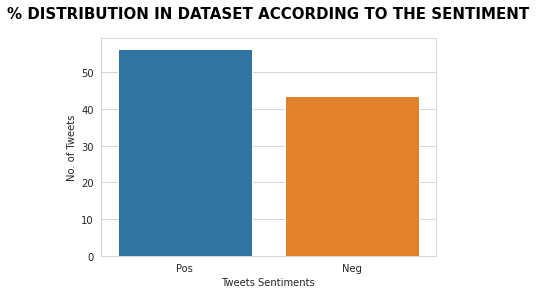

No handles with labels found to put in legend.


In [11]:
# Memvisualisasikan data menggunakan Seaborn
sn.set_style('whitegrid');
ax=sn.barplot(x=['Pos','Neg'], y=df.TruthValue.value_counts()*100/df.TruthValue.value_counts().sum());
ax.set_title('% DISTRIBUTION IN DATASET ACCORDING TO THE SENTIMENT',loc='center', pad=20, fontdict={'fontsize': 15,
        'fontweight': 'bold',
        'color': 'black',
        'verticalalignment': 'baseline',
        });
ax.set(xlabel='Tweets Sentiments', ylabel='No. of Tweets');
plt.show()
ax.legend()
ax.figure.savefig('Total-positive-negative-counts.png',pad_inches=5)



---------------------



In [12]:
!python2 /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/code/preprocess.py /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/dataset/test-processed.csv

Traceback (most recent call last):
  File "/content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/code/preprocess.py", line 107, in <module>
    preprocess_csv(csv_file_name, processed_file_name, test_file=False)
  File "/content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/code/preprocess.py", line 81, in preprocess_csv
    positive = int(line[:line.find(',')])
ValueError: invalid literal for int() with base 10: 'is so sad for my apl friend'


### **Stats.py**

In [13]:
!python2 /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/code/stats.py /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/dataset/test-processed-processed.csv


Calculating frequency distribution
Saved uni-frequency distribution to /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/dataset/test-processed-processed-freqdist.pkl
Saved bi-frequency distribution to /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/dataset/test-processed-processed-freqdist-bi.pkl

[Analysis Statistics]
Tweets => Total: 0, Positive: 0, Negative: 0
Traceback (most recent call last):
  File "/content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/code/stats.py", line 106, in <module>
    print 'User Mentions => Total: %d, Avg: %.4f, Max: %d' % (num_mentions, num_mentions / float(num_tweets), max_mentions)
ZeroDivisionError: float division by zero


In [14]:
!python2 /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/code/stats.py /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/dataset/train-processed-processed.csv

Processing 100000/100000
Calculating frequency distribution
Saved uni-frequency distribution to /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/dataset/train-processed-processed-freqdist.pkl
Saved bi-frequency distribution to /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/dataset/train-processed-processed-freqdist-bi.pkl

[Analysis Statistics]
Tweets => Total: 100000, Positive: 56462, Negative: 43538
User Mentions => Total: 0, Avg: 0.0000, Max: 0
URLs => Total: 0, Avg: 0.0000, Max: 0
Emojis => Total: 0, Positive: 0, Negative: 0, Avg: 0.0000, Max: 0
Words => Total: 1283269, Unique: 50361, Avg: 12.8327, Max: 41, Min: 0
Bigrams => Total: 1183437, Unique: 392543, Avg: 11.8344


### **Baseline.py**

In [15]:
!python2 /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/code/baseline.py TRAIN = True

Correct = 65.32%


In [16]:
!python2 /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/code/naivebayes.py TRAIN = True

Generating feature vectors
Processing 100000/100000

Extracting features & training batches
Processing 1/1

Testing
Processing 1/1
Correct: 7735/10000 = 77.3500 %


### **Logistic.py**

In [17]:
!python3 /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/code/logistic.py TRAIN = True

Generating feature vectors
Processing 100000/100000

Extracting features & training batches
2022-01-23 11:51:17.069818: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Iteration 28/180, loss:0.6692, acc:0.69802022-01-23 11:51:22.575667: W tensorflow/core/data/root_dataset.cc:163] Optimization loop failed: CANCELLED: Operation was cancelled
Iteration 31/180, loss:0.6670, acc:0.65602022-01-23 11:51:22.915655: W tensorflow/core/data/root_dataset.cc:163] Optimization loop failed: CANCELLED: Operation was cancelled
Iteration 119/180, loss:0.6109, acc:0.72402022-01-23 11:51:33.317635: W tensorflow/core/data/root_dataset.cc:163] Optimization loop failed: CANCELLED: Operation was cancelled
Iteration 133/180, loss:0.6217, acc:0.69402022-01-23 11:51:34.959175: W tensorflow/core/data/root_dataset.cc:163] Optimization loop failed: CANCELLED: Operation was ca

### **DecisionTree.py**

In [18]:
!python3 /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/code/decisiontree.py TRAIN = True

Generating feature vectors
Processing 100000/100000

Extracting features & training batches
Processing 1/1

Testing
Processing 1/1
Correct: 6860/10000 = 68.6000 %


### **RandomForest.py**

In [19]:
!python3 /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/code/randomforest.py

Generating feature vectors
Processing 100000/100000

Extracting features & training batches
Processing 1/1

Testing
Processing 1/1
Correct: 7639/10000 = 76.3900 %


### **Xgboost1.py**

In [21]:
# rename file agar tidak bertabrakan dengan xgboost modul
!python3 /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/code/xgboost1.py

Generating feature vectors
Processing 100000/100000

Extracting features & training batches
Processing 1/1

Testing
Processing 1/1
Correct: 7695/10000 = 76.9500 %


### **SVM.py**

In [22]:
!python3 /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/code/svm.py

Generating feature vectors
Processing 100000/100000

Extracting features & training batches
Processing 1/1

Testing
Processing 1/1
Correct: 7836/10000 = 78.3600 %


### **Neuralnet.py**

In [27]:
!python3 /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/code/neuralnet.py TRAIN = True

Generating feature vectors
Processing 100000/100000

Extracting features & training batches
2022-01-23 12:23:20.014356: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Iteration 180/180, loss:0.5398, acc:0.7320
Epoch: 1, val_acc:0.7617
Accuracy improved from 0.0000 to 0.7617, saving model
Iteration 180/180, loss:0.4850, acc:0.7740
Epoch: 2, val_acc:0.7732
Accuracy improved from 0.7617 to 0.7732, saving model
Iteration 180/180, loss:0.4995, acc:0.7680
Epoch: 3, val_acc:0.7721
Iteration 180/180, loss:0.4529, acc:0.7940
Epoch: 4, val_acc:0.7725
Iteration 180/180, loss:0.4589, acc:0.7880
Epoch: 5, val_acc:0.7713
Testing
Generating feature vectors


Predicting batches

Saved to 1layerneuralnet.csv


### **Download File Glove **

In [24]:
!wget https://nlp.stanford.edu/data/glove.6B.zip

--2022-01-23 12:14:42--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-01-23 12:14:42--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.06MB/s    in 2m 40s  

2022-01-23 12:17:22 (5.15 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [25]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


## **LSTM.py**

In [26]:
!python3 /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/code/lstm.py

Looking for GLOVE vectors
Processing 400000/0

Found 31735 words in GLOVE
Generating feature vectors
Processing 100000/100000

2022-01-23 12:18:23.079444: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 200)           18000200  
                                                                 
 dropout (Dropout)           (None, 40, 200)           0         
                                                                 
 lstm (LSTM)                 (None, 128)               168448    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                         

### **CNN.py**

In [28]:
!python3 /content/drive/MyDrive/FX_ML/Twitter-Sentiment-Analysis-main/code/cnn.py

Looking for GLOVE seeds
Processing 400000/0

Generating feature vectors
Processing 100000/100000

2022-01-23 12:31:19.608356: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Epoch 1/8
704/704 [==============================] - 26s 25ms/step - loss: 0.5336 - accuracy: 0.7247 - val_loss: 0.4700 - val_accuracy: 0.7733
Epoch 2/8
704/704 [==============================] - 17s 24ms/step - loss: 0.4497 - accuracy: 0.7885 - val_loss: 0.4539 - val_accuracy: 0.7816
Epoch 3/8
704/704 [==============================] - 17s 25ms/step - loss: 0.4007 - accuracy: 0.8179 - val_loss: 0.4575 - val_accuracy: 0.7816
Epoch 4/8
704/704 [==============================] - 17s 25ms/step - loss: 0.3492 - accuracy: 0.8454 - val_loss: 0.4775 - val_accuracy: 0.7777
Epoch 5/8
704/704 [==============================] - 18s 25ms/step - loss: 0.3090 - accuracy: 0.8647 - val_loss: